In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [0]:
from tensorflow.examples.tutorials.mnist import input_data


In [3]:
mnist=input_data.read_data_sets('/content',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /content/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /content/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /content/t10k-images-idx3-ubyte.gz
Extracting /content/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
def generator(z,reuse=None):
  with tf.variable_scope("gen",reuse=reuse):
    hidden1=tf.layers.dense(inputs=z,units=128,activation=tf.nn.leaky_relu)
    hidden2=tf.layers.dense(inputs=hidden1,units=128,activation=tf.nn.leaky_relu)
    output=tf.layers.dense(inputs=hidden2,units=784,activation=tf.nn.tanh)
    return output
  

In [0]:
def discriminator(x,reuse=None):
  with tf.variable_scope("dis",reuse=reuse):
    hidden1=tf.layers.dense(inputs=x,units=128,activation=tf.nn.leaky_relu)
    hidden2=tf.layers.dense(inputs=hidden1,units=128,activation=tf.nn.leaky_relu)
    logits=tf.layers.dense(inputs=hidden2,units=1)
    output=tf.sigmoid(logits)
    return output,logits

In [0]:
z=tf.placeholder(tf.float32,shape=[None,100])
real_images=tf.placeholder(tf.float32,shape=[None,784])

In [0]:
G=generator(z)

real_output,real_logits=discriminator(real_images)
fake_output,fake_logits=discriminator(G,reuse=True)


In [0]:
def loss_func(logits_in,labels_in):
  return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in,labels=labels_in))

In [0]:
D_loss_real=loss_func(logits_in=real_logits,labels_in=tf.ones_like(real_logits)*0.9)
D_loss_fake=loss_func(logits_in=fake_logits,labels_in=tf.zeros_like(fake_logits))
D_loss=D_loss_real+D_loss_fake

In [0]:
G_loss=loss_func(logits_in=fake_logits,labels_in=tf.ones_like(fake_logits))

In [0]:
learning_rate=0.001
train_vars=tf.trainable_variables()

In [0]:
d_vars=[x for x in train_vars if "dis" in x.name]
g_vars=[y for y in train_vars if "gen" in y.name]

In [0]:
D_trainer=tf.train.AdamOptimizer(learning_rate).minimize(D_loss,var_list=d_vars)
G_trainer=tf.train.AdamOptimizer(learning_rate).minimize(G_loss,var_list=g_vars)

In [0]:
init=tf.global_variables_initializer()
num_epochs=500
batch_size=100
num_batches=mnist.train.num_examples//batch_size
samples=[]
saver=tf.train.Saver(var_list=g_vars)

In [15]:
with tf.Session() as sess:
  sess.run(init)
  for i in range(num_epochs):
    for j in range(num_batches):
      batch=mnist.train.next_batch(batch_size)
      batch_images=batch[0].reshape([batch_size,784])
      batch_images=batch_images*2-1
      batch_z=np.random.uniform(-1,1,size=[batch_size,100])
      
      _=sess.run(D_trainer,feed_dict={z:batch_z,real_images:batch_images})
      _=sess.run(G_trainer,feed_dict={z:batch_z})
      loss=sess.run(G_loss,feed_dict={z:batch_z})
    
    
    print("Currently on step {} , loss={}".format(i,loss))
    sample_z=np.random.uniform(-1,1,size=[1,100])
    sample_gen_image=sess.run(generator(z,reuse=True),feed_dict={z:sample_z})
    samples.append(sample_gen_image)
  saver.save(sess,'/content/500_epochs_model.ckpt')
                              
    
  
  

Currently on step 0 , loss=3.505650043487549
Currently on step 1 , loss=5.201396465301514
Currently on step 2 , loss=1.502576470375061
Currently on step 3 , loss=0.7748628854751587
Currently on step 4 , loss=4.535179615020752
Currently on step 5 , loss=4.224401473999023
Currently on step 6 , loss=1.2125742435455322
Currently on step 7 , loss=1.6087470054626465
Currently on step 8 , loss=6.9824442863464355
Currently on step 9 , loss=0.8031566143035889
Currently on step 10 , loss=2.4888715744018555
Currently on step 11 , loss=0.7284291982650757
Currently on step 12 , loss=3.7065865993499756
Currently on step 13 , loss=2.029135227203369
Currently on step 14 , loss=1.6568520069122314
Currently on step 15 , loss=2.2304811477661133
Currently on step 16 , loss=1.3792214393615723
Currently on step 17 , loss=1.3976856470108032
Currently on step 18 , loss=0.9033535718917847
Currently on step 19 , loss=2.889540910720825
Currently on step 20 , loss=2.0234479904174805
Currently on step 21 , loss=1.

In [0]:
#plt.imshow(samples[99].reshape(28,28),cmap="Greys")
new_samples=[]

In [18]:
with tf.Session() as sess:
  saver.restore(sess,'/content/500_epochs_model.ckpt')
  for x in range(50):
    sample_z=np.random.uniform(-1,1,size=[1,100])
    gen_sample=sess.run(generator(z,reuse=True),feed_dict={z:sample_z})
    new_samples.append(gen_sample)

INFO:tensorflow:Restoring parameters from /content/500_epochs_model.ckpt


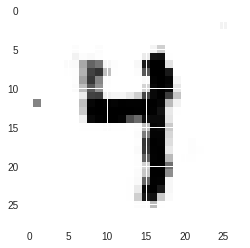

In [29]:
plt.imshow(new_samples[34].reshape(28,28),cmap="Greys")